## Support Tickets NLP (basic)

With the support tickets reviewed. We need to look into basic text / nlp information that is genderated from these support tickets.

We wont be pulling every information we can. This is only ment to be a basic info before creating a ai model.

### Python Setup

In [1]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

/Users/eric/venv-metal/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


basic spacy setup

In [2]:
nlp = spacy.load("en_core_web_sm")

/Users/eric/venv-metal/lib/python3.9/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


### Import Support File

In [3]:
df = pd.read_csv("../data/tweeter_support_tickets.csv")

In [4]:
df.head()

,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve
0,0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333
1,1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000
2,2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222
3,3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500
4,4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981197 entries, 0 to 981196
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               981197 non-null  object 
 1   tweet_id                 981127 non-null  float64
 2   author_id                980971 non-null  float64
 3   inbound                  981123 non-null  object 
 4   created_at               981127 non-null  object 
 5   text                     981127 non-null  object 
 6   response_tweet_id        966212 non-null  object 
 7   in_response_to_tweet_id  145 non-null     object 
 8   support_team             892928 non-null  object 
 9   conversation             966056 non-null  object 
 10  conversation_count       966056 non-null  float64
 11  conversation_dates       966056 non-null  object 
 12  date_resolved            875147 non-null  object 
 13  time_to_resolve          966056 non-null  float64
dtypes: f

In [6]:
df = df.reset_index()

### NLP Data Setup

Setup the nlp process over both the text (initial intake) and the conversation 

In [7]:
test_doc = nlp(df['text'][0])
test_doc

@115714 y’all lie about your “great” connection. 5 bars LTE, still won’t load something. Smh.

#### NLP Doc Inital Request

Check basic tokenization on the sample test text

In [8]:
for token in test_doc:
    print(token.text)

@115714
y’
all
lie
about
your
“
great
”
connection
.
5
bars
LTE
,
still
wo
n’t
load
something
.
Smh
.


Test out the process on a smaller dataset before preforming on the entire one.

In [9]:
test_small_df = df[:250]

In [10]:
test_small_df['text_doc'] = test_small_df['text'].apply(lambda x: list(nlp(str(x))))

/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_26152/3599946483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_small_df['text_doc'] = test_small_df['text'].apply(lambda x: list(nlp(str(x))))


In [11]:
print(f"Data type: {test_small_df.dtypes['text_doc']}")

Data type: object


Review the newly created column

In [12]:
test_small_df.head()

,index,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve,text_doc
0,0,0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333,"[@115714, y’, all, lie, about, your, “, great,..."
1,1,1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000,"[@115714, whenever, I, contact, customer, supp..."
2,2,2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222,"[actually, that, 's, a, broken, link, you, sen..."
3,3,3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500,"[Yo, @Ask_Spectrum, ,, your, customer, service..."
4,4,4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333,"[My, picture, on, @Ask_Spectrum, pretty, much,..."


Preform the tokenization over the entire dataframe

In [13]:
df['text_doc'] = df['text'].apply(lambda x: list(nlp(str(x))))

In [14]:
df.head()

,index,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve,text_doc
0,0,0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333,"[@115714, y’, all, lie, about, your, “, great,..."
1,1,1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000,"[@115714, whenever, I, contact, customer, supp..."
2,2,2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222,"[actually, that, 's, a, broken, link, you, sen..."
3,3,3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500,"[Yo, @Ask_Spectrum, ,, your, customer, service..."
4,4,4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333,"[My, picture, on, @Ask_Spectrum, pretty, much,..."


### Create conversation nlp doc

In [15]:
test_conv = df['conversation'][0]

In [16]:
test_conv_doc = nlp(test_conv)

In [17]:
for token in test_conv_doc:
    print(token.text)

@115713
H
there
!
We
'd
definitely
like
to
work
with
you
on
this
,
how
long
have
you
been
experiencing
this
issue
?
-AA


@115714
y’
all
lie
about
your
“
great
”
connection
.
5
bars
LTE
,
still
wo
n’t
load
something
.
Smh
.




From previous attempts, due to the size of the conversation the tokenization process takes a very long time. 

We will look into splitting the dataframe into smaller parts to mergering back into a single dataframe.

TODO: Need to find a better way. Kernel kills every run.

Create a new conversation tokens column

In [18]:
# df['conversation_doc'] = df['conversation'].apply(lambda x: list(nlp(str(x))))

### Tokenize the NLP Doc

In [19]:
def tokenizeDoc(input_doc):
    """ 
    tokenize the incoming doc
    """
    return [token.text for token in input_doc]

In [20]:
df['text_tokens'] = df['text_doc'].apply(lambda x: tokenizeDoc(x))

In [21]:
df.head()

,index,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve,text_doc,text_tokens
0,0,0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333,"[@115714, y’, all, lie, about, your, “, great,...","[@115714, y’, all, lie, about, your, “, great,..."
1,1,1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000,"[@115714, whenever, I, contact, customer, supp...","[@115714, whenever, I, contact, customer, supp..."
2,2,2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222,"[actually, that, 's, a, broken, link, you, sen...","[actually, that, 's, a, broken, link, you, sen..."
3,3,3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500,"[Yo, @Ask_Spectrum, ,, your, customer, service...","[Yo, @Ask_Spectrum, ,, your, customer, service..."
4,4,4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333,"[My, picture, on, @Ask_Spectrum, pretty, much,...","[My, picture, on, @Ask_Spectrum, pretty, much,..."


In [22]:
print(df['text_tokens'][0])

['@115714', 'y’', 'all', 'lie', 'about', 'your', '“', 'great', '”', 'connection', '.', '5', 'bars', 'LTE', ',', 'still', 'wo', 'n’t', 'load', 'something', '.', 'Smh', '.']


#### Token Length

Curious to see after about of text or tokens

In [23]:
len(df['text_tokens'][0])

23

In [24]:
df['text_token_length'] = df['text_tokens'].apply(lambda x: len(x))

In [25]:
df.head()

,index,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve,text_doc,text_tokens,text_token_length
0,0,0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333,"[@115714, y’, all, lie, about, your, “, great,...","[@115714, y’, all, lie, about, your, “, great,...",23
1,1,1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000,"[@115714, whenever, I, contact, customer, supp...","[@115714, whenever, I, contact, customer, supp...",30
2,2,2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222,"[actually, that, 's, a, broken, link, you, sen...","[actually, that, 's, a, broken, link, you, sen...",13
3,3,3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500,"[Yo, @Ask_Spectrum, ,, your, customer, service...","[Yo, @Ask_Spectrum, ,, your, customer, service...",25
4,4,4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333,"[My, picture, on, @Ask_Spectrum, pretty, much,...","[My, picture, on, @Ask_Spectrum, pretty, much,...",19


In [26]:
print(f"Number of tokens in the initial sample: {df['text_token_length'][0]}")

Number of tokens in the initial sample: 23


### Remove stop words

Create a function to remove the stop words and punctuation from the nlp doc

In [27]:
def stopWordsRemoveal(incoming_doc_list):
    # return [token.text for token in incoming_doc_list if not token.is_stop]
    return [token.text for token in incoming_doc_list if not token.is_stop and not token.is_punct]

In [28]:
test_stop_list = df['text_doc'][0]
test_stop_words = stopWordsRemoveal(test_stop_list)

Compare both the incoming doc list to the stop words filter list

In [29]:
print(test_stop_list)

[@115714, y’, all, lie, about, your, “, great, ”, connection, ., 5, bars, LTE, ,, still, wo, n’t, load, something, ., Smh, .]


In [30]:
print(test_stop_words)

['@115714', 'y’', 'lie', 'great', 'connection', '5', 'bars', 'LTE', 'wo', 'load', 'Smh']


test out the function in a dataframe

In [31]:
test_stop_df = df[:50].copy()

In [32]:
test_stop_df.head()

,index,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve,text_doc,text_tokens,text_token_length
0,0,0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333,"[@115714, y’, all, lie, about, your, “, great,...","[@115714, y’, all, lie, about, your, “, great,...",23
1,1,1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000,"[@115714, whenever, I, contact, customer, supp...","[@115714, whenever, I, contact, customer, supp...",30
2,2,2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222,"[actually, that, 's, a, broken, link, you, sen...","[actually, that, 's, a, broken, link, you, sen...",13
3,3,3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500,"[Yo, @Ask_Spectrum, ,, your, customer, service...","[Yo, @Ask_Spectrum, ,, your, customer, service...",25
4,4,4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333,"[My, picture, on, @Ask_Spectrum, pretty, much,...","[My, picture, on, @Ask_Spectrum, pretty, much,...",19


In [33]:
test_stop_df['text_clean'] = test_stop_df['text_doc'].apply(lambda x: stopWordsRemoveal(x))

In [34]:
test_stop_df.head()

,index,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve,text_doc,text_tokens,text_token_length,text_clean
0,0,0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333,"[@115714, y’, all, lie, about, your, “, great,...","[@115714, y’, all, lie, about, your, “, great,...",23,"[@115714, y’, lie, great, connection, 5, bars,..."
1,1,1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000,"[@115714, whenever, I, contact, customer, supp...","[@115714, whenever, I, contact, customer, supp...",30,"[@115714, contact, customer, support, tell, sh..."
2,2,2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222,"[actually, that, 's, a, broken, link, you, sen...","[actually, that, 's, a, broken, link, you, sen...",13,"[actually, broken, link, sent, incorrect, info..."
3,3,3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500,"[Yo, @Ask_Spectrum, ,, your, customer, service...","[Yo, @Ask_Spectrum, ,, your, customer, service...",25,"[Yo, @Ask_Spectrum, customer, service, reps, s..."
4,4,4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333,"[My, picture, on, @Ask_Spectrum, pretty, much,...","[My, picture, on, @Ask_Spectrum, pretty, much,...",19,"[picture, @Ask_Spectrum, pretty, day, pay, $, ..."


Create a new stop words column. We can use this to compare against other support teams.

In [35]:
df['text_token_clean'] = df['text_doc'].apply(lambda x: stopWordsRemoveal(x))

In [36]:
df.head()

,index,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve,text_doc,text_tokens,text_token_length,text_token_clean
0,0,0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333,"[@115714, y’, all, lie, about, your, “, great,...","[@115714, y’, all, lie, about, your, “, great,...",23,"[@115714, y’, lie, great, connection, 5, bars,..."
1,1,1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000,"[@115714, whenever, I, contact, customer, supp...","[@115714, whenever, I, contact, customer, supp...",30,"[@115714, contact, customer, support, tell, sh..."
2,2,2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222,"[actually, that, 's, a, broken, link, you, sen...","[actually, that, 's, a, broken, link, you, sen...",13,"[actually, broken, link, sent, incorrect, info..."
3,3,3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500,"[Yo, @Ask_Spectrum, ,, your, customer, service...","[Yo, @Ask_Spectrum, ,, your, customer, service...",25,"[Yo, @Ask_Spectrum, customer, service, reps, s..."
4,4,4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333,"[My, picture, on, @Ask_Spectrum, pretty, much,...","[My, picture, on, @Ask_Spectrum, pretty, much,...",19,"[picture, @Ask_Spectrum, pretty, day, pay, $, ..."


In [37]:
print(df['text_token_clean'][0])

['@115714', 'y’', 'lie', 'great', 'connection', '5', 'bars', 'LTE', 'wo', 'load', 'Smh']


#### Stop words length

To compare the number of token to stop words. Create a new column to review the count.

In [40]:
print(len(df['text_token_clean'][0]))

11


In [41]:
df['text_token_clean_length'] = df['text_token_clean'].apply(lambda x: len(x))

In [42]:
print(f"Number of cleaned text in the initial sample: {df['text_token_clean_length'][0]}")

Number of cleaned text in the initial sample: 11


### Average Support Ticket Length

Review the average support ticket. We will be looking at both the raw and cleaned tokens for each team.

In [43]:
print(f"Average support ticket length: {df['text_token_length'].mean()}")

Average support ticket length: 24.394589465724007


Text(0.5, 1.0, 'Support Ticket Tokens Dist')

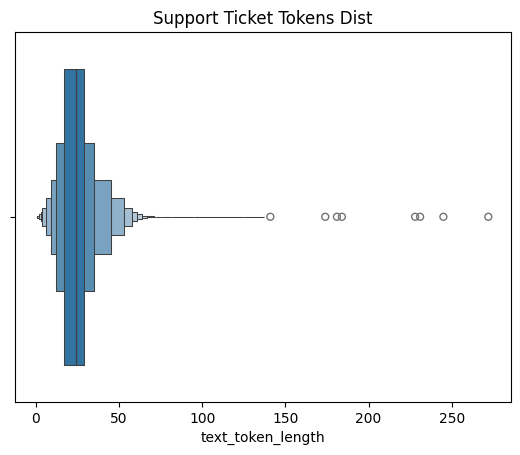

In [44]:
t = sns.boxenplot(x=df['text_token_length'])
t.set_title("Support Ticket Tokens Dist")

In [45]:
print(f"Average number of 'clean' token per support ticket: {df['text_token_clean_length'].mean()}")

Average number of 'clean' token per support ticket: 11.546465184871131


Text(0.5, 1.0, 'Support Tikcet Clean Tokens Dist')

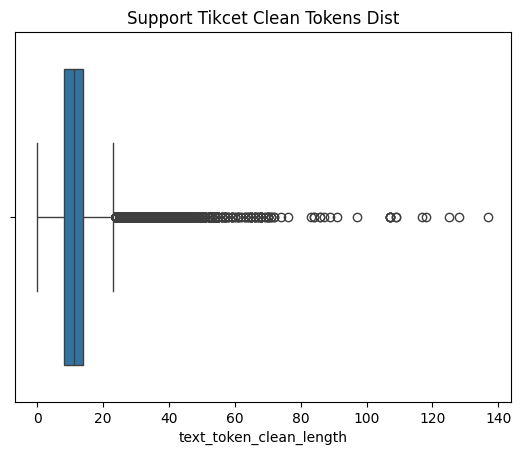

In [46]:
g = sns.boxplot(x=df['text_token_clean_length'])
g.set_title("Support Tikcet Clean Tokens Dist")

### Common Words/Tokens

Create a list of common words or tokens used by the requestor

In [47]:
test_token_df = df[:100].copy()

In [48]:
test_token_list = []

In [49]:
test_token_df['text_token_clean'].apply(lambda x: test_token_list.extend(x))

0     None
1     None
2     None
3     None
4     None
      ... 
95    None
96    None
97    None
98    None
99    None
Name: text_token_clean, Length: 100, dtype: object

In [50]:
len(test_token_list)

1026

Need to preform over the entire dataframe

In [51]:
token_list = []
df['text_token_clean'].apply(lambda x: token_list.extend(x))

0         None
1         None
2         None
3         None
4         None
          ... 
981192    None
981193    None
981194    None
981195    None
981196    None
Name: text_token_clean, Length: 981197, dtype: object

In [52]:
print(f"Number of words: {len(token_list)}")

Number of words: 11329357


Turn the list into a series to use the panda functions

In [53]:
tokens_series = pd.Series(token_list)

In [54]:
token_series_count = tokens_series.value_counts()

Text(0, 0.5, 'Count')

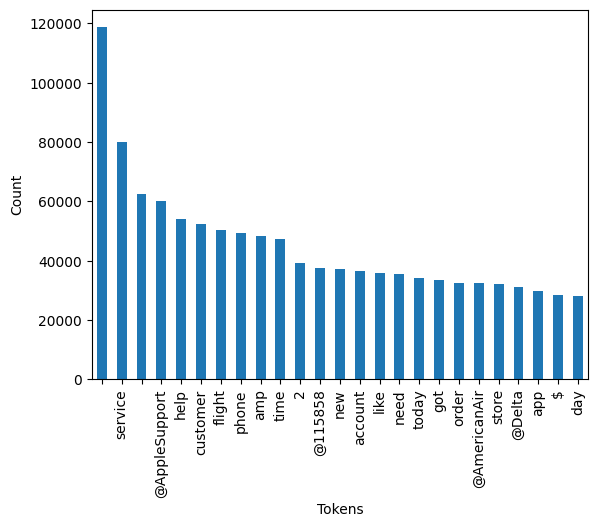

In [55]:
token_series_count[:25].plot(kind='bar')
plt.xlabel("Tokens")
plt.ylabel('Count')